In [1]:
import numpy as np
import pandas as pd

In [2]:
#RAW DATA FROM SCRAPPIN
df= pd.read_csv('/home/gibeon/Desktop/MY/fvldata/STORAGE/TABLES/pTable001.csv')

#df['Pos'] = df.index
#df.reset_index(level=0, inplace=True)

#df['INDX'] = pd.Series(list(range(len(df['Team']))))
df.head()    ####  REMOVE DIFF,one of WDL,

,Pos,Dir,Team,P,W,D,L,GF,GA,DIFF,Points,Season
0,1,-1,VL Moscow,12,8,1,3,21,9,12,25,Season 12657
1,2,1,VL Rome,12,7,2,3,22,16,6,23,Season 12657
2,3,0,VL London,12,7,2,3,19,17,2,23,Season 12657
3,4,-1,VL Copenhagen,12,6,3,3,11,10,1,21,Season 12657
4,5,0,VL Madrid,12,5,5,2,23,13,10,20,Season 12657


In [3]:
# df2 = df.set_index(['P', 'Pos'],drop=False)  ##interesing stuff
# df2.head()


In [4]:
#df.head()
df['Team'].unique()

array(['VL Moscow', 'VL Rome', 'VL London', 'VL Copenhagen', 'VL Madrid',
       'VL Berlin', 'VL Kiev', 'VL Amsterdam', 'VL Bern', 'VL Vienna',
       'VL Lisbon', 'VL Athens', 'VL Paris', 'VL Zagreb', 'VL Prague',
       'VL Ankara'], dtype=object)

In [5]:
def teamCoded(S):
    
#     cats=['MADRID', 'AMSTERDAM','BERLIN','LONDON','ROME','OSLO','LISBON','PARIS','BRUSSELS','ATHENS','STOCKHOLM',
#           'COPENHAGEN','VIENNA', 'ANKARA','EDINBURGH','BERN']
    
    cats=['MADRID', 'AMSTERDAM','BERLIN','LONDON','ROME','MOSCOW','LISBON','PARIS','ZAGREB','ATHENS','PRAGUE',
          'COPENHAGEN','VIENNA', 'ANKARA','KIEV','BERN']

    catsRev=[]
    for tm in S:
        if tm == cats[0]:
            catsRev.append(1)
        elif tm == cats[1]:
            catsRev.append(2)
        elif tm == cats[2]:
            catsRev.append(3)
        elif tm == cats[3]:
            catsRev.append(4)
        elif tm == cats[4]:
            catsRev.append(5)
        elif tm == cats[5]:
            catsRev.append(6)
        elif tm == cats[6]:
            catsRev.append(7)
        elif tm == cats[7]:
            catsRev.append(8)
        elif tm == cats[8]:
            catsRev.append(9)
        elif tm == cats[9]:
            catsRev.append(10)
        elif tm == cats[10]:
            catsRev.append(11)
        elif tm == cats[11]:
            catsRev.append(12)
        elif tm == cats[12]:
            catsRev.append(13)
        elif tm == cats[13]:
            catsRev.append(14)
        elif tm == cats[14]:
            catsRev.append(15)
        elif tm == cats[15]:
            catsRev.append(16)
    return catsRev


df['TEAM']=pd.Series([x.split()[1].upper() for x in df.Team])
df['HOMECODE']=teamCoded(df['TEAM'])
df['AWAYCODE']=teamCoded(df['TEAM'])

In [6]:
df.head()

,Pos,Dir,Team,P,W,D,L,GF,GA,DIFF,Points,Season,TEAM,HOMECODE,AWAYCODE
0,1,-1,VL Moscow,12,8,1,3,21,9,12,25,Season 12657,MOSCOW,6,6
1,2,1,VL Rome,12,7,2,3,22,16,6,23,Season 12657,ROME,5,5
2,3,0,VL London,12,7,2,3,19,17,2,23,Season 12657,LONDON,4,4
3,4,-1,VL Copenhagen,12,6,3,3,11,10,1,21,Season 12657,COPENHAGEN,12,12
4,5,0,VL Madrid,12,5,5,2,23,13,10,20,Season 12657,MADRID,1,1


In [7]:
df1 = df[df.isna().any(axis=1)]

In [8]:
df1

,Pos,Dir,Team,P,W,D,L,GF,GA,DIFF,Points,Season,TEAM,HOMECODE,AWAYCODE


In [9]:
dfR= pd.read_csv('/home/gibeon/Desktop/MY/fvldata/STORAGE/TABLES/pResu001.csv')

#dfR= pd.read_csv('/home/ideon/Desktop/DATA CENTRE/resultDataR.csv')
dfR.head()

,TIMER,TEAMSr,HTR,FTR,P,Season
0,17/07/19 08:10,VL Berlin - VL Athens,2:0,4:0,1,Season 12657
1,17/07/19 08:10,VL Zagreb - VL Paris,1:3,1:3,1,Season 12657
2,17/07/19 08:10,VL Copenhagen - VL Moscow,0:0,1:0,1,Season 12657
3,17/07/19 08:10,VL London - VL Rome,0:0,2:0,1,Season 12657
4,17/07/19 08:10,VL Bern - VL Kiev,2:0,4:0,1,Season 12657


In [10]:


#function to input(ps) DF column of form/content (3:2) eg HT result or HT results and out put ps.series with eithe 0,1 or 2
def results(ps):

    #ps = ps.dropna()
    lp=[]
    for x in ps:
       # print(x)
        
        h=x.replace(':','  ')[:1]
      #  print(h)
        a=x.replace(':','  ')[1:]
        if float(h) > float(a):
            lp.append(1)

        elif float(a) > float(h):
            lp.append(2)
        else:
            lp.append(0)

    return pd.Series(lp)



def over_under(ps,n):
    lp=[]
    for x in ps:
        h=x.replace(':','  ')[:1]
        a=x.replace(':','  ')[1:]
        # if goals sum is greater than n value is 1
        
        if (float(h) + float(a)) > float(n):
            lp.append(1)

        else:
            #means it is under n eg under 2.5
            lp.append(0)

    return pd.Series(lp)

##addition collumn of all goals
def goalsum(ps):
    lp=[]
    for x in ps:
        h=x.replace(':','  ')[:1]
        a=x.replace(':','  ')[1:]
        # if goals sum is greater than n value is 1
        
        lp.append((float(h) + float(a)))

    return pd.Series(lp)

In [11]:
#======================================================================
dfR['TEAMSr']
dfR['TEAMSr']=pd.Series([x.upper() for x in dfR.TEAMSr])
dfR['TEAMSr']=pd.Series([x.upper() for x in dfR.TEAMSr])
#split TEAMS into HOME & AWAY 
dfR['HOME']=pd.Series([x.split()[1] for x in dfR.TEAMSr]) 
dfR['AWAY']=pd.Series([x.split()[4] for x in dfR.TEAMSr])

dfR['TIMEr']=pd.Series([x.split()[1] for x in dfR.TIMER])
#Use teamCode FX to code HOME & AWAY collumns and crean new HOMECODE & AWAYCODE
dfR['TC']=dfR['HOME']+' '+dfR['AWAY']

dfR['HOMECODE']=teamCoded(dfR['HOME'])
dfR['AWAYCODE']=teamCoded(dfR['AWAY'])
#dfR['TEAMSC']=dfR['HOMECODE'] + dfR['AWAYCODE']
#teamCode(dfR['HOME'])


    
dfR['FT_Goals']=pd.Series([str(x).replace(':','  ')[:] for x in dfR.FTR])
dfR['HT_Goals']=pd.Series([str(x).replace(':','  ')[:] for x in dfR.HTR])
dfR['FT_home_goals']=pd.Series([str(x).replace(':','  ')[:1] for x in dfR.FTR])
dfR['FT_away_goals']=pd.Series([str(x).replace(':','  ')[1:] for x in dfR.FTR])
dfR['HT_home_goals']=pd.Series([str(x).replace(':','  ')[:1] for x in dfR.HTR])
dfR['HT_away_goals']=pd.Series([str(x).replace(':','  ')[1:] for x in dfR.HTR])



dfR['FT_Results_1_0_2']=results(dfR['FT_Goals'])
dfR['HT_Results_1_0_2']=results(dfR['HT_Goals'])


# FT UNDER /OVER Goals
p = 3.5
n = 2.5
q = 1.5

dfR['Under_Over_3.5']= over_under(dfR['FT_Goals'],p)
dfR['Under_Over_2.5']= over_under(dfR['FT_Goals'],n)
dfR['Under_Over_1.5']= over_under(dfR['FT_Goals'],q)



dfR['Sum_Goals']= goalsum(dfR['FT_Goals'])





dfR['Sum_Goals']= goalsum(dfR['FT_Goals'])# addition column of all goals

#dfR['HT_Results_1_0_2']=results(dfR['HT_Goals'])

colum=['P','Season','TC','HOMECODE', 'AWAYCODE','TIMEr','HTR', 'FTR', 'HT_home_goals', 'HT_away_goals',
       'FT_home_goals','FT_away_goals','Sum_Goals','HT_Results_1_0_2','FT_Results_1_0_2','Under_Over_1.5','Under_Over_2.5',
       'Under_Over_3.5']
resu= dfR.reindex(columns=colum).fillna(0)#.values


colum=['TC','HOMECODE', 'AWAYCODE','TIMEr','HTR', 'FTR', 'HT_home_goals', 'HT_away_goals',
       'FT_home_goals','FT_away_goals','HT_Results_1_0_2','FT_Results_1_0_2','TIMER','TIMED','1','2','X','HT1','HT2','HTX','FS (0:0)','FS(0:0)2','FS(0:0)X','G(0.5)O','G(0.5)U',
         'G(1.5)O','G(1.5)U','G(2.5)O','G(2.5)U','G(3.5)O','G(3.5)U','G(4.5)O','G(4.5)U','Under_Over_1.5','Under_Over_2.5',
       'Under_Over_3.5']

In [12]:
resu.head()

,P,Season,TC,HOMECODE,AWAYCODE,TIMEr,HTR,FTR,HT_home_goals,HT_away_goals,FT_home_goals,FT_away_goals,Sum_Goals,HT_Results_1_0_2,FT_Results_1_0_2,Under_Over_1.5,Under_Over_2.5,Under_Over_3.5
0,1,Season 12657,BERLIN ATHENS,3,10,08:10,2:0,4:0,2,0,4,0,4.0,1,1,1,1,1
1,1,Season 12657,ZAGREB PARIS,9,8,08:10,1:3,1:3,1,3,1,3,4.0,2,2,1,1,1
2,1,Season 12657,COPENHAGEN MOSCOW,12,6,08:10,0:0,1:0,0,0,1,0,1.0,0,1,0,0,0
3,1,Season 12657,LONDON ROME,4,5,08:10,0:0,2:0,0,0,2,0,2.0,0,1,1,0,0
4,1,Season 12657,BERN KIEV,16,15,08:10,2:0,4:0,2,0,4,0,4.0,1,1,1,1,1


In [13]:
#gr = resu.groupby([resu['HOMECODE'], resu['AWAYCODE']])

In [14]:
#gr # what the f*ck is this pandas object

In [15]:
df.head()

,Pos,Dir,Team,P,W,D,L,GF,GA,DIFF,Points,Season,TEAM,HOMECODE,AWAYCODE
0,1,-1,VL Moscow,12,8,1,3,21,9,12,25,Season 12657,MOSCOW,6,6
1,2,1,VL Rome,12,7,2,3,22,16,6,23,Season 12657,ROME,5,5
2,3,0,VL London,12,7,2,3,19,17,2,23,Season 12657,LONDON,4,4
3,4,-1,VL Copenhagen,12,6,3,3,11,10,1,21,Season 12657,COPENHAGEN,12,12
4,5,0,VL Madrid,12,5,5,2,23,13,10,20,Season 12657,MADRID,1,1


In [16]:
##magic happens here

dff1 = pd.merge(df,resu, on =('Season','P','HOMECODE'))#,by='Season')#,left_on='lkey', right_on='rkey')
#dff1['AWAYCODE'] = dff1['AWAYCODE_x']
dff2 = pd.merge(df,resu, on =('Season','P','AWAYCODE'))#,left_on='lkey', right_on='rkey') 

In [17]:
dff1.sort_values(by=['Season','P'])
dff1 = dff1.drop_duplicates()
dff1.head()

,Pos,Dir,Team,P,W,D,L,GF,GA,DIFF,...,HT_home_goals,HT_away_goals,FT_home_goals,FT_away_goals,Sum_Goals,HT_Results_1_0_2,FT_Results_1_0_2,Under_Over_1.5,Under_Over_2.5,Under_Over_3.5
0,4,-1,VL Copenhagen,12,6,3,3,11,10,1,...,2,1,3,2,5.0,1,1,1,1,1
3,5,0,VL Madrid,12,5,5,2,23,13,10,...,1,1,2,2,4.0,0,0,1,1,1
6,6,-1,VL Berlin,12,6,2,4,21,11,10,...,1,0,2,0,2.0,1,1,1,0,0
9,7,1,VL Kiev,12,6,2,4,24,23,1,...,1,3,1,5,6.0,2,2,1,1,1
12,9,0,VL Bern,12,4,3,5,14,12,2,...,0,0,0,0,0.0,0,0,0,0,0


In [18]:
dff2.sort_values(by=['Season','P'])
dff2 = dff2.drop_duplicates()
dff2.head()

,Pos,Dir,Team,P,W,D,L,GF,GA,DIFF,...,HT_home_goals,HT_away_goals,FT_home_goals,FT_away_goals,Sum_Goals,HT_Results_1_0_2,FT_Results_1_0_2,Under_Over_1.5,Under_Over_2.5,Under_Over_3.5
0,1,-1,VL Moscow,12,8,1,3,21,9,12,...,1,3,1,5,6.0,2,2,1,1,1
3,2,1,VL Rome,12,7,2,3,22,16,6,...,1,0,2,0,2.0,1,1,1,0,0
6,3,0,VL London,12,7,2,3,19,17,2,...,1,1,2,2,4.0,0,0,1,1,1
9,8,0,VL Amsterdam,12,4,5,3,14,15,-1,...,0,1,1,1,2.0,2,0,1,0,0
12,11,1,VL Lisbon,12,3,5,4,14,17,-3,...,2,1,3,2,5.0,1,1,1,1,1


In [19]:
#dff1.iloc[:, 1:82]#[dff1.TEAM == 'MADRID']  #  most IMPORTANT FILTER OF DFS....NOTE NOTE NOTE
#len(dff1.columns)#[data.three > 5]
#len(dff1.columns)

dff1.iloc[:, 1:20]#[dff1.TEAM == 'MADRID']

,Dir,Team,P,W,D,L,GF,GA,DIFF,Points,Season,TEAM,HOMECODE,AWAYCODE_x,TC,AWAYCODE_y,TIMEr,HTR,FTR
0,-1,VL Copenhagen,12,6,3,3,11,10,1,21,Season 12657,COPENHAGEN,12,12,COPENHAGEN LISBON,7,08:51,2:1,3:2
3,0,VL Madrid,12,5,5,2,23,13,10,20,Season 12657,MADRID,1,1,MADRID LONDON,4,08:51,1:1,2:2
6,-1,VL Berlin,12,6,2,4,21,11,10,20,Season 12657,BERLIN,3,3,BERLIN ROME,5,08:51,1:0,2:0
9,1,VL Kiev,12,6,2,4,24,23,1,20,Season 12657,KIEV,15,15,KIEV MOSCOW,6,08:51,1:3,1:5
12,0,VL Bern,12,4,3,5,14,12,2,15,Season 12657,BERN,16,16,BERN PARIS,8,08:51,0:0,0:0
15,-1,VL Vienna,12,4,2,6,15,16,-1,14,Season 12657,VIENNA,13,13,VIENNA PRAGUE,11,08:51,2:0,3:1
18,1,VL Athens,12,4,2,6,15,19,-4,14,Season 12657,ATHENS,10,10,ATHENS ANKARA,14,08:51,0:1,1:1
21,-1,VL Zagreb,12,3,3,6,12,18,-6,12,Season 12657,ZAGREB,9,9,ZAGREB AMSTERDAM,2,08:51,0:1,1:1
24,0,VL Moscow,13,9,1,3,25,10,15,28,Season 12657,MOSCOW,6,6,MOSCOW BERN,16,08:54,0:1,4:1
27,0,VL Rome,13,8,2,3,25,17,8,26,Season 12657,ROME,5,5,ROME VIENNA,13,08:54,3:0,3:1


In [20]:
#dff2.iloc[:, 31:52]#[data.three > 5]
#len(dff1.columns)
dff2['HOMECODE'] = dff2['HOMECODE_y']#//couse by duplicate files
#dff2.iloc[:, 1:82]#[dff2.TEAM == 'VIENNA']

In [21]:
datag = pd.merge(dff1,dff2, on =('Season','P','HOMECODE'))

In [22]:
datag.sort_values(by=['Season','P'])
datag = datag.drop_duplicates()
datag

,Pos_x,Dir_x,Team_x,P,W_x,D_x,L_x,GF_x,GA_x,DIFF_x,...,HT_home_goals_y,HT_away_goals_y,FT_home_goals_y,FT_away_goals_y,Sum_Goals_y,HT_Results_1_0_2_y,FT_Results_1_0_2_y,Under_Over_1.5_y,Under_Over_2.5_y,Under_Over_3.5_y
0,4,-1,VL Copenhagen,12,6,3,3,11,10,1,...,2,1,3,2,5.0,1,1,1,1,1
1,5,0,VL Madrid,12,5,5,2,23,13,10,...,1,1,2,2,4.0,0,0,1,1,1
2,6,-1,VL Berlin,12,6,2,4,21,11,10,...,1,0,2,0,2.0,1,1,1,0,0
3,7,1,VL Kiev,12,6,2,4,24,23,1,...,1,3,1,5,6.0,2,2,1,1,1
4,9,0,VL Bern,12,4,3,5,14,12,2,...,0,0,0,0,0.0,0,0,0,0,0
5,10,-1,VL Vienna,12,4,2,6,15,16,-1,...,2,0,3,1,4.0,1,1,1,1,1
6,12,1,VL Athens,12,4,2,6,15,19,-4,...,0,1,1,1,2.0,2,0,1,0,0
7,14,-1,VL Zagreb,12,3,3,6,12,18,-6,...,0,1,1,1,2.0,2,0,1,0,0
8,1,0,VL Moscow,13,9,1,3,25,10,15,...,0,1,4,1,5.0,2,1,1,1,1
9,2,0,VL Rome,13,8,2,3,25,17,8,...,3,0,3,1,4.0,1,1,1,1,1


In [23]:
datag.head()

,Pos_x,Dir_x,Team_x,P,W_x,D_x,L_x,GF_x,GA_x,DIFF_x,...,HT_home_goals_y,HT_away_goals_y,FT_home_goals_y,FT_away_goals_y,Sum_Goals_y,HT_Results_1_0_2_y,FT_Results_1_0_2_y,Under_Over_1.5_y,Under_Over_2.5_y,Under_Over_3.5_y
0,4,-1,VL Copenhagen,12,6,3,3,11,10,1,...,2,1,3,2,5.0,1,1,1,1,1
1,5,0,VL Madrid,12,5,5,2,23,13,10,...,1,1,2,2,4.0,0,0,1,1,1
2,6,-1,VL Berlin,12,6,2,4,21,11,10,...,1,0,2,0,2.0,1,1,1,0,0
3,7,1,VL Kiev,12,6,2,4,24,23,1,...,1,3,1,5,6.0,2,2,1,1,1
4,9,0,VL Bern,12,4,3,5,14,12,2,...,0,0,0,0,0.0,0,0,0,0,0


In [24]:
datag.columns

colt = ['Season','TC_x','HOMECODE','AWAYCODE','TEAM_x','Team_x','Pos_x', 'Dir_x', 'P', 'W_x', 'D_x', 'L_x', 'GF_x', 'GA_x','DIFF_x',
        'Points_x','TEAM_y','Team_y','Pos_y', 'Dir_y','W_y', 'D_y', 'L_y', 'GF_y', 'GA_y', 'DIFF_y', 'Points_y','HTR_y',
       'FTR_y', 'HT_home_goals_y', 'HT_away_goals_y', 'FT_home_goals_y',
       'FT_away_goals_y', 'Sum_Goals_y', 'HT_Results_1_0_2_y',
       'FT_Results_1_0_2_y', 'Under_Over_1.5_y', 'Under_Over_2.5_y',
       'Under_Over_3.5_y']

col2 = ['HOMECODE','AWAYCODE','Pos_x', 'Dir_x', 'P', 'W_x', 'D_x', 'L_x', 'GF_x', 'GA_x','DIFF_x',
        'Points_x','Pos_y', 'Dir_y','W_y', 'D_y', 'L_y', 'GF_y', 'GA_y', 'DIFF_y', 'Points_y','Under_Over_2.5_y',]

predict1x2 = ['HOMECODE','AWAYCODE','Pos_x', 'Dir_x', 'P', 'W_x', 'D_x', 'L_x', 'GF_x', 'GA_x','DIFF_x',
        'Points_x','Pos_y', 'Dir_y','W_y', 'D_y', 'L_y', 'GF_y', 'GA_y', 'DIFF_y', 'Points_y','FT_Results_1_0_2_y',]
datag.columns

Index(['Pos_x', 'Dir_x', 'Team_x', 'P', 'W_x', 'D_x', 'L_x', 'GF_x', 'GA_x',
       'DIFF_x', 'Points_x', 'Season', 'TEAM_x', 'HOMECODE', 'AWAYCODE_x',
       'TC_x', 'AWAYCODE_y', 'TIMEr_x', 'HTR_x', 'FTR_x', 'HT_home_goals_x',
       'HT_away_goals_x', 'FT_home_goals_x', 'FT_away_goals_x', 'Sum_Goals_x',
       'HT_Results_1_0_2_x', 'FT_Results_1_0_2_x', 'Under_Over_1.5_x',
       'Under_Over_2.5_x', 'Under_Over_3.5_x', 'Pos_y', 'Dir_y', 'Team_y',
       'W_y', 'D_y', 'L_y', 'GF_y', 'GA_y', 'DIFF_y', 'Points_y', 'TEAM_y',
       'HOMECODE_x', 'AWAYCODE', 'TC_y', 'HOMECODE_y', 'TIMEr_y', 'HTR_y',
       'FTR_y', 'HT_home_goals_y', 'HT_away_goals_y', 'FT_home_goals_y',
       'FT_away_goals_y', 'Sum_Goals_y', 'HT_Results_1_0_2_y',
       'FT_Results_1_0_2_y', 'Under_Over_1.5_y', 'Under_Over_2.5_y',
       'Under_Over_3.5_y'],
      dtype='object')

In [25]:
#change collum to change what to predict
datag2 =  datag.reindex(columns= col2)
#datag2.iloc[:, 1:38].head()#[dff2.TEAM == 'VIENNA']
datag2.head()

,HOMECODE,AWAYCODE,Pos_x,Dir_x,P,W_x,D_x,L_x,GF_x,GA_x,...,Pos_y,Dir_y,W_y,D_y,L_y,GF_y,GA_y,DIFF_y,Points_y,Under_Over_2.5_y
0,12,7,4,-1,12,6,3,3,11,10,...,11,1,3,5,4,14,17,-3,14,1
1,1,4,5,0,12,5,5,2,23,13,...,3,0,7,2,3,19,17,2,23,1
2,3,5,6,-1,12,6,2,4,21,11,...,2,1,7,2,3,22,16,6,23,0
3,15,6,7,1,12,6,2,4,24,23,...,1,-1,8,1,3,21,9,12,25,1
4,16,8,9,0,12,4,3,5,14,12,...,13,0,3,3,6,18,19,-1,12,0


In [26]:
#datag2.iloc[40:140, 1:38]#.head()#[dff2.TEAM == 'VIENNA']

In [27]:
#with open('/home/ideon/Desktop/datag5.csv', 'a') as f:
  #  datag.to_csv(f, index=False, header=True)

In [28]:
mod_data=datag2.reindex(columns=col2).fillna(0)

In [29]:
mod_data.head()

,HOMECODE,AWAYCODE,Pos_x,Dir_x,P,W_x,D_x,L_x,GF_x,GA_x,...,Pos_y,Dir_y,W_y,D_y,L_y,GF_y,GA_y,DIFF_y,Points_y,Under_Over_2.5_y
0,12,7,4,-1,12,6,3,3,11,10,...,11,1,3,5,4,14,17,-3,14,1
1,1,4,5,0,12,5,5,2,23,13,...,3,0,7,2,3,19,17,2,23,1
2,3,5,6,-1,12,6,2,4,21,11,...,2,1,7,2,3,22,16,6,23,0
3,15,6,7,1,12,6,2,4,24,23,...,1,-1,8,1,3,21,9,12,25,1
4,16,8,9,0,12,4,3,5,14,12,...,13,0,3,3,6,18,19,-1,12,0


In [30]:
t=datag2.shape[0]  # # t is the number of raws
t

6736

In [31]:
#mod_data
dataR=mod_data.values
dataR

array([[12,  7,  4, ..., -3, 14,  1],
       [ 1,  4,  5, ...,  2, 23,  1],
       [ 3,  5,  6, ...,  6, 23,  0],
       ...,
       [15,  4, 14, ...,  5, 41,  1],
       [13,  1, 15, ..., 30, 59,  1],
       [12,  7, 16, ..., 19, 59,  0]])

In [32]:
p1=dataR   # Uncomment when manual is used
p1 
x

NameError: name 'x' is not defined

In [ ]:
X, y = p1[:,:21],p1[:,21:]

In [ ]:
X = X.reshape(p1.shape[0], 21)
X = X.astype('float32')

X = X/60
X

In [ ]:
X.shape

In [ ]:
#import numpy as np
#from sklearn.model_selection import train_test_split

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [ ]:
#X_train

In [ ]:
#X_test

In [ ]:
#y_train

In [ ]:
#y_test

In [ ]:
from keras.utils import np_utils
NB_CLASSES =2
import numpy as np
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [ ]:
y_train

In [ ]:
y_train

In [42]:
#separate Train,test Data

def vfl_data(t,p):
    n=int(((100-p)/100)*t)
    print('Train Data:',t-(t-n),'Test Data:',t-n)
    dataTr=dataR[:n]
    dataTe=dataR[n:]
    
    x_train=dataTr[:,0:21]
    x2_train=x_train.reshape(n,7,3)
    x_train = x2_train[:, np.newaxis, :,:]
    y_train= dataTr[:,21]


    x1_test=dataTe[:,0:21]
    x2_test=x1_test.reshape(t-n,7,3)
    x_test = x2_test[:, np.newaxis, :,:]
    y_test= dataTe[:,21]
    return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test)=vfl_data(t,10)

Train Data: 6062 Test Data: 674


In [43]:
# from keras.utils import np_utils
# NB_CLASSES =2
# import numpy as np
# y_train = np_utils.to_categorical(y_train, NB_CLASSES)
# y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [44]:
x_train

array([[[[12,  7,  4],
         [-1, 12,  6],
         [ 3,  3, 11],
         ...,
         [11,  1,  3],
         [ 5,  4, 14],
         [17, -3, 14]]],


       [[[ 1,  4,  5],
         [ 0, 12,  5],
         [ 5,  2, 23],
         ...,
         [ 3,  0,  7],
         [ 2,  3, 19],
         [17,  2, 23]]],


       [[[ 3,  5,  6],
         [-1, 12,  6],
         [ 2,  4, 21],
         ...,
         [ 2,  1,  7],
         [ 2,  3, 22],
         [16,  6, 23]]],


       ...,


       [[[ 5,  7,  6],
         [-1,  6,  3],
         [ 0,  3, 12],
         ...,
         [ 3,  1,  3],
         [ 2,  1, 12],
         [ 5,  7, 11]]],


       [[[ 2,  8,  7],
         [ 1,  6,  2],
         [ 2,  2,  8],
         ...,
         [11,  1,  2],
         [ 1,  3, 12],
         [13, -1,  7]]],


       [[[ 9,  3,  8],
         [-1,  6,  2],
         [ 2,  2,  9],
         ...,
         [ 5,  1,  3],
         [ 1,  2,  9],
         [ 6,  3, 10]]]])

In [45]:
x_test

array([[[[ 6, 10,  9],
         [ 1,  6,  2],
         [ 2,  2,  7],
         ...,
         [10,  1,  2],
         [ 2,  2,  7],
         [ 9, -2,  8]]],


       [[[12, 16, 12],
         [ 1,  6,  2],
         [ 1,  3, 10],
         ...,
         [15,  0,  1],
         [ 2,  3,  9],
         [15, -6,  5]]],


       [[[ 3, 11,  3],
         [-1,  7,  4],
         [ 1,  2, 12],
         ...,
         [ 7,  1,  3],
         [ 2,  2, 10],
         [10,  0, 11]]],


       ...,


       [[[15,  4, 14],
         [ 0, 30,  8],
         [ 4, 18, 40],
         ...,
         [ 8,  0, 12],
         [ 5, 13, 45],
         [40,  5, 41]]],


       [[[13,  1, 15],
         [ 0, 30,  7],
         [ 5, 18, 21],
         ...,
         [ 2,  0, 17],
         [ 8,  5, 63],
         [33, 30, 59]]],


       [[[12,  7, 16],
         [ 0, 30,  7],
         [ 4, 19, 19],
         ...,
         [ 4,  0, 18],
         [ 5,  7, 44],
         [25, 19, 59]]]])

In [46]:
y_train

array([1, 1, 0, ..., 0, 1, 1])

In [47]:
y_test

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,

In [48]:

NB_CLASSES = 1 # number of outputs = number of digits///depend on what to predict


(x_train, y_train), (x_test, y_test)=vfl_data(t,10)

# consider them as float and normalize
X_train= (x_train.astype('float32'))/15
X_test= (x_test.astype('float32'))/15

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train, X_test, y_train, y_test

# y_train = np_utils.to_categorical(y_train, NB_CLASSES)
# y_test = np_utils.to_categorical(y_test, NB_CLASSES)

Train Data: 6062 Test Data: 674
6062 train samples
674 test samples


(array([[[[ 0.8       ,  0.46666667,  0.26666668],
          [-0.06666667,  0.8       ,  0.4       ],
          [ 0.2       ,  0.2       ,  0.73333335],
          ...,
          [ 0.73333335,  0.06666667,  0.2       ],
          [ 0.33333334,  0.26666668,  0.93333334],
          [ 1.1333333 , -0.2       ,  0.93333334]]],
 
 
        [[[ 0.06666667,  0.26666668,  0.33333334],
          [ 0.        ,  0.8       ,  0.33333334],
          [ 0.33333334,  0.13333334,  1.5333333 ],
          ...,
          [ 0.2       ,  0.        ,  0.46666667],
          [ 0.13333334,  0.2       ,  1.2666667 ],
          [ 1.1333333 ,  0.13333334,  1.5333333 ]]],
 
 
        [[[ 0.2       ,  0.33333334,  0.4       ],
          [-0.06666667,  0.8       ,  0.4       ],
          [ 0.13333334,  0.26666668,  1.4       ],
          ...,
          [ 0.13333334,  0.06666667,  0.46666667],
          [ 0.13333334,  0.2       ,  1.4666667 ],
          [ 1.0666667 ,  0.4       ,  1.5333333 ]]],
 
 
        ...,
 
 
  

In [49]:
y_test[:33]

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0])

In [50]:
x_train

array([[[[12,  7,  4],
         [-1, 12,  6],
         [ 3,  3, 11],
         ...,
         [11,  1,  3],
         [ 5,  4, 14],
         [17, -3, 14]]],


       [[[ 1,  4,  5],
         [ 0, 12,  5],
         [ 5,  2, 23],
         ...,
         [ 3,  0,  7],
         [ 2,  3, 19],
         [17,  2, 23]]],


       [[[ 3,  5,  6],
         [-1, 12,  6],
         [ 2,  4, 21],
         ...,
         [ 2,  1,  7],
         [ 2,  3, 22],
         [16,  6, 23]]],


       ...,


       [[[ 5,  7,  6],
         [-1,  6,  3],
         [ 0,  3, 12],
         ...,
         [ 3,  1,  3],
         [ 2,  1, 12],
         [ 5,  7, 11]]],


       [[[ 2,  8,  7],
         [ 1,  6,  2],
         [ 2,  2,  8],
         ...,
         [11,  1,  2],
         [ 1,  3, 12],
         [13, -1,  7]]],


       [[[ 9,  3,  8],
         [-1,  6,  2],
         [ 2,  2,  9],
         ...,
         [ 5,  1,  3],
         [ 1,  2,  9],
         [ 6,  3, 10]]]])

In [51]:
y_test

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,

In [52]:
# Import AI MODULES & FRAMEWORKS
from __future__ import division, print_function
from keras import backend as K
from keras.callbacks import ModelCheckpoint 
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
#from keras.layers.convolutional import MaxPooling2D,AveragePooling2D
from keras.layers.pooling import AveragePooling2D,GlobalAveragePooling2D,MaxPooling2D,GlobalMaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense, Dropout 
#from keras_contrib
#from keras_contrib.layers.core import CosineDense
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
from keras.layers import LSTM
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt
import numpy as np
import matplotlib.pyplot as plt
import os 

from keras.initializers import TruncatedNormal

In [53]:
#define the ConvNet

class LeNet:
    @staticmethod
    def build(input_shape, classes):
        
        model = Sequential()
        model.add(Conv2D(10, kernel_size=2, padding="same",input_shape=input_shape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(1, 2), strides=(2, 2)))
# CONV => RELU => POOL
        # CONV => RELU => POOl
        model.add(Conv2D(20, kernel_size=2, border_mode="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(1, 2), strides=(2, 2)))
    
         # Flatten => RELU layers
        model.add(Flatten())
        #model.add(Dense(50))
        #model.add(Activation("relu"))
        #model.add(Dropout(0.1))
        model.add(Dense(110))
        model.add(Activation("relu"))
        # a softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        return model
    
class gNet7:
    @staticmethod
    def build(input_shape, classes):
        
        model = Sequential()
        model.add(Conv2D(16, kernel_size=1, padding="same",input_shape=input_shape))
        model.add(Activation('relu'))
        model.add(Conv2D(16, (1, 2), padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(1, 1)))
        model.add(Dropout(0.25))
        model.add(Conv2D(32, (1, 2), padding='same'))
        model.add(Activation('relu'))
        model.add(Conv2D(32, 1, 2))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(1, 2)))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(231))
        model.add(Activation('relu'))
        model.add(Dropout(0.5))
       # a softmax classifier
        model.add(Dense(1))
        model.add(Activation("softmax"))
        return model
    

    
class gNet:
    @staticmethod
    def build(input_shape, classes):
        
        model = Sequential()
        model.add(Conv2D(82, kernel_size=1, padding="same",input_shape=input_shape))
        model.add(Activation('relu'))
        #model.add(Conv2D(32, (1, 2), padding='same'))
       # model.add(Activation('relu'))
       # model.add(MaxPooling2D(pool_size=(1, 2)))
       # model.add(Dropout(0.25))
        model.add(Conv2D(64, (1, 2), padding='same'))
        model.add(Activation('relu'))
       # model.add(Conv2D(64, 1, 2))
       # model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(1, 2)))
        model.add(Dropout(0.15))
        model.add(Flatten())
        model.add(Dense(112))
        model.add(Activation('relu'))
        #model.add(Dropout(0.5))
       # a softmax classifier
        model.add(Dense(classes))
        model.add(Activation("sigmoid"))
        return model
    


    
    
    
    
    
    
    
    
   #kernel_initializer
#Initializer for the kernel weights matrix.
#bias_initializer 
    #conv+conv+maxpool+dropout+conv+conv+maxpool
class gNet1:
    @staticmethod
    def build(input_shape, classes):
        
        model = Sequential()
        model.add(Conv2D(8, kernel_size=1, padding="same",input_shape=input_shape))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(1, 1)))
        model.add(Dropout(0.10))
        model.add(Conv2D(16, 1, 2))
        model.add(Activation('relu'))
        #model.add(MaxPooling2D(pool_size=(1, 2)))
       # seq.add(BatchNormalization())
        model.add(Dropout(0.15))
        model.add(Flatten())
        model.add(Dense(100))
        model.add(Activation('relu'))
        model.add(Dropout(0.2))
        model.add(Dense(250))
        model.add(Activation('relu'))
        model.add(Dropout(0.2))
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        return model
    
    
    
    
    
    
    
    
    
    
    


    #conv+conv+maxpool+dropout+conv+conv+maxpool
class gNet2:
    @staticmethod
    def build(input_shape, classes):
        
        model = Sequential()
        model.add(Conv2D(16, kernel_size=1, padding="same",input_shape=input_shape))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(1, 2)))
        model.add(Dropout(0.15))
        model.add(Conv2D(32, 1, 2))
        model.add(Activation('relu'))
        #model.add(MaxPooling2D(pool_size=(1, 2)))
        model.add(Dropout(0.15))
        model.add(Flatten())
        model.add(LSTM(1,70))
        model.add(Dropout(0.1))
        model.add(Dense(250))
        model.add(Activation('relu'))
        model.add(Dropout(0.1))
        model.add(Dense(classes))
        model.add(Activation("linear"))
        return model



In [54]:
#SETTINGS##

#MODEL_DIR = "/home/gibeon/Desktop/MY/fvldata/STORAGE/Models/" #over2.5
MODEL_DIR = "/home/gibeon/Desktop/MY/fvldata/STORAGE/Models/hxa/"
MODEL_DIR2 = "/home/gibeon/Desktop/MY/fvldata/STORAGE/Models/MOD/"

BATCH_SIZE = 20
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.25
ROWS,COLS = 7, 3 # input image dimensions
INPUT_SHAPE = (1, ROWS, COLS)

count = 0
NB_EPOCH = 30
INITIAL_EPOCH = 0


In [55]:

#for step in range(1):

model = gNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)

model.compile(loss="binary_crossentropy", optimizer=OPTIMIZER,metrics=["accuracy"])

#model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

# save best model 
checkpoint = ModelCheckpoint( filepath=os.path.join(MODEL_DIR, "model-{epoch:02d}.h5"),save_best_only=True) 

history = model.fit(X_train, y_train,batch_size=BATCH_SIZE, epochs=NB_EPOCH,initial_epoch = INITIAL_EPOCH,verbose=VERBOSE,validation_split=VALIDATION_SPLIT,callbacks=[checkpoint])
score = model.evaluate(X_test, y_test, verbose=VERBOSE)

# save best model with
checkpoint = ModelCheckpoint( filepath=os.path.join(MODEL_DIR2, "model-{epoch:02d}.h5"),save_best_only=True)
#sleep(2)
print("Test score:", score[0])
print('Test accuracy:', score[1])
#print('Test accuracy percentage:', round(score[1]*100,3),'%')
#model.save('g8FT_model.h5')

W0718 19:27:32.633795 139905930995520 deprecation_wrapper.py:119] From /home/gibeon/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0718 19:27:32.636909 139905930995520 deprecation_wrapper.py:119] From /home/gibeon/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 19:27:32.639664 139905930995520 deprecation_wrapper.py:119] From /home/gibeon/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0718 19:27:32.679281 139905930995520 deprecation_wrapper.py:119] From /home/gibeon/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0718 1

Train on 4546 samples, validate on 1516 samples
Epoch 1/30
4546/4546 [==============================] - 5s 1ms/step - loss: 0.6831 - acc: 0.5528 - val_loss: 0.6631 - val_acc: 0.6174
Epoch 2/30
4546/4546 [==============================] - 3s 645us/step - loss: 0.6618 - acc: 0.6093 - val_loss: 0.6503 - val_acc: 0.6280
Epoch 3/30
4546/4546 [==============================] - 3s 670us/step - loss: 0.6418 - acc: 0.6377 - val_loss: 0.6317 - val_acc: 0.6511
Epoch 4/30
4546/4546 [==============================] - 3s 667us/step - loss: 0.6327 - acc: 0.6401 - val_loss: 0.6482 - val_acc: 0.6247
Epoch 5/30
4546/4546 [==============================] - 3s 729us/step - loss: 0.6241 - acc: 0.6491 - val_loss: 0.6245 - val_acc: 0.6266
Epoch 6/30
4546/4546 [==============================] - 3s 682us/step - loss: 0.6218 - acc: 0.6428 - val_loss: 0.6031 - val_acc: 0.6609
Epoch 7/30
4546/4546 [==============================] - 3s 711us/step - loss: 0.6158 - acc: 0.6533 - val_loss: 0.6152 - val_acc: 0.6517
Ep

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


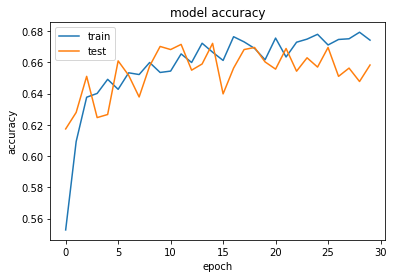

In [56]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from keras.models import load_model

model.save("/home/gibeon/Desktop/MY/fvldata/STORAGE/Models/USE/vfl_model.h5")  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model



In [ ]:
# Import AI MODULES & FRAMEWORKS
from __future__ import division, print_function
from keras import backend as K
from keras.callbacks import ModelCheckpoint 
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
#from keras.layers.convolutional import MaxPooling2D,AveragePooling2D
from keras.layers.pooling import AveragePooling2D,GlobalAveragePooling2D,MaxPooling2D,GlobalMaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense, Dropout 
#from keras_contrib
#from keras_contrib.layers.core import CosineDense
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
from keras.layers import LSTM
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt
import numpy as np
import matplotlib.pyplot as plt
import os 

from keras.initializers import TruncatedNormal

In [ ]:
# returns a compiled model
# identical to the previous one
model = load_model("/home/gibeon/Desktop/MY/fvldata/STORAGE/Models/USE/vfl_model.h5")

In [ ]:
#SETTINGS##

#MODEL_DIR = "/home/gibeon/Desktop/MY/fvldata/STORAGE/Models/" #over2.5
MODEL_DIR = "/home/gibeon/Desktop/MY/fvldata/STORAGE/Models/hxa/"
MODEL_DIR2 = "/home/gibeon/Desktop/MY/fvldata/STORAGE/Models/MOD/"

BATCH_SIZE = 5
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.15
ROWS,COLS = 7, 3 # input image dimensions
INPUT_SHAPE = (1, ROWS, COLS)

count = 0
NB_EPOCH = 30
INITIAL_EPOCH = 0


In [ ]:
checkpoint = ModelCheckpoint( filepath=os.path.join(MODEL_DIR, "model-{epoch:02d}.h5"),save_best_only=True) 
history = model.fit(X_train, y_train,batch_size=BATCH_SIZE, epochs=NB_EPOCH,initial_epoch = INITIAL_EPOCH,verbose=VERBOSE,validation_split=VALIDATION_SPLIT,callbacks=[checkpoint])
score = model.evaluate(X_test, y_test, verbose=VERBOSE)

# save best model with
checkpoint = ModelCheckpoint( filepath=os.path.join(MODEL_DIR2, "model-{epoch:02d}.h5"),save_best_only=True)
#sleep(2)
print("Test score:", score[0])
print('Test accuracy:', score[1])
#print('Test accuracy percentage:', round(score[1]*100,3),'%')
#model.save('g8FT_model.h5')

In [ ]:
#model.save("/home/gibeon/Desktop/MY/fvldata/STORAGE/Models/USE/vfl{}_model.h5".format(score[1]))

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()